## Métodos de Conjunto en Machine Learning: Random Forest, Bagging y Boosting

Los métodos de conjunto en Machine Learning (ML) son técnicas que combinan múltiples modelos individuales para mejorar la precisión y la robustez de las predicciones. Los más populares son **Random Forest**, **Bagging** y **Boosting**. A continuación se explica cada uno:

### 1. Bagging (Bootstrap Aggregating)
- **Concepto**: Bagging es un método de conjunto que reduce la variabilidad de las predicciones combinando múltiples versiones de un modelo entrenado en subconjuntos diferentes del conjunto de datos.
- **Proceso**:
  1. Se crean varios subconjuntos del conjunto de entrenamiento usando muestreo con reemplazo (bootstrap).
  2. Se entrena un modelo (como un árbol de decisión) en cada subconjunto.
  3. Las predicciones se combinan promediando (para regresión) o votando (para clasificación).
- **Ventajas**: Reduce el sobreajuste (overfitting) y la varianza, haciendo que el modelo sea más estable.

### 2. Random Forest
- **Concepto**: Random Forest es una extensión del Bagging, específicamente para árboles de decisión, que además introduce aleatoriedad en la selección de características.
- **Proceso**:
  1. Igual que en Bagging, se crean varios subconjuntos del conjunto de datos usando muestreo con reemplazo.
  2. Se entrenan múltiples árboles de decisión, pero en cada nodo de un árbol, solo un subconjunto aleatorio de las características es considerado para realizar la división.
  3. Las predicciones de todos los árboles se combinan (promediando o votando) para obtener la predicción final.
- **Ventajas**: Además de reducir la varianza, también combate la correlación entre los árboles, mejorando la precisión y reduciendo el sobreajuste.

### 3. Boosting
- **Concepto**: Boosting es otro método de conjunto, pero a diferencia de Bagging, los modelos se construyen secuencialmente, cada uno corrigiendo los errores de su predecesor.
- **Proceso**:
  1. Se entrena un modelo en el conjunto de entrenamiento.
  2. Se evalúan los errores y se asignan pesos mayores a las observaciones mal clasificadas.
  3. El siguiente modelo se entrena con un enfoque especial en estas observaciones difíciles.
  4. Este proceso se repite, y las predicciones de los modelos se combinan en una ponderación final para obtener la predicción.
- **Variantes populares**: AdaBoost, Gradient Boosting, y XGBoost.
- **Ventajas**: Tiende a reducir el sesgo (bias), logrando un modelo más preciso, aunque puede ser más propenso al sobreajuste si no se controla adecuadamente.

### Comparación y Uso Práctico
- **Bagging** (incluido Random Forest) es excelente para reducir la varianza, ideal para modelos que son inestables, como los árboles de decisión.
- **Boosting** es más adecuado para reducir el sesgo, y suele ofrecer mejores resultados en problemas difíciles, aunque es más propenso a sobreajustar si no se ajustan bien los parámetros.

Cada uno de estos métodos se adapta a diferentes tipos de problemas y datos, por lo que es importante probar y ajustar en función de la situación específica.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.datasets import load_digits
from scipy.ndimage import rotate
warnings.filterwarnings(action='ignore')

In [2]:
data = load_digits()

In [3]:
# Mostrar la descripción de data
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
# Variables explicativas
X = data['data']
X.shape

(1797, 64)

In [7]:
# Variable respuesta.
y = data['target']
y.shape

(1797,)

In [8]:
# Define a visualization function.
def show_data(X, y, n, angle=0):
    print(y[n])
    image_matrix = X[n,:].reshape((8,8))                                        # Reshape from 1D to 2D matrix.
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)        # Rotate if wanted.
    plt.imshow(image_matrix, cmap='Greys',interpolation='None')
    plt.show()

5


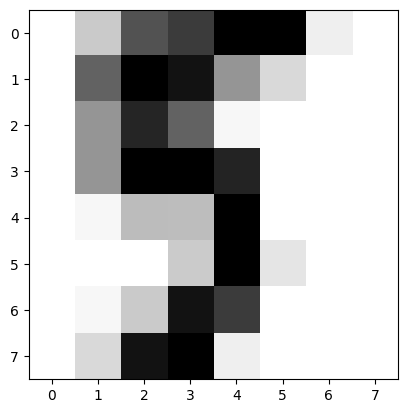

9


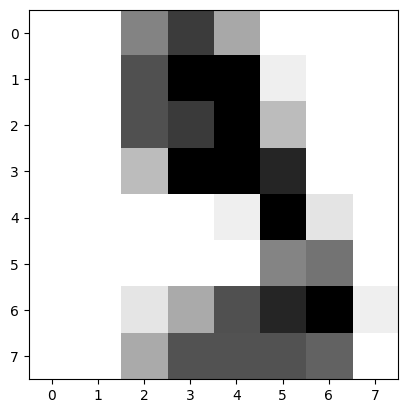

1


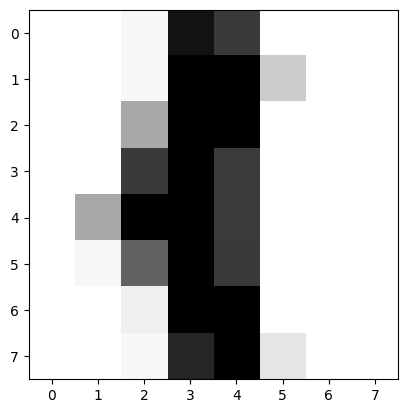

In [10]:
for i in [15,29,99]:
    show_data(X,y,i)

# Dataset `load_digits` - Scikit-learn

El dataset `load_digits` es una colección de imágenes de dígitos escritos a mano, incluido en la librería Scikit-learn. Es comúnmente utilizado para tareas de clasificación y reconocimiento de patrones.

## Descripción del Dataset

- **Imágenes**: El dataset contiene imágenes en escala de grises de dígitos del 0 al 9.
- **Dimensiones**: Cada imagen tiene un tamaño de 8x8 píxeles, lo que se traduce en 64 características.
- **Valores de los Píxeles**: Cada píxel está representado por un valor entero entre 0 y 16, donde 0 indica la menor intensidad (blanco) y 16 la mayor intensidad (negro).
- **Etiquetas**: Las etiquetas asociadas a las imágenes son los dígitos correspondientes (0-9).

## Uso Común

Este dataset es ideal para:

- **Clasificación**: Se utiliza para probar y comparar diferentes algoritmos de clasificación, como Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), redes neuronales, entre otros.
- **Reconocimiento de Patrones**: Es útil para enseñar y demostrar conceptos básicos de reconocimiento de patrones en machine learning.

## Ejemplo de Uso en Python

```python
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Cargar el dataset
digits = load_digits()

# Mostrar algunas imágenes de ejemplo
fig, axes = plt.subplots(2, 4, figsize=(8, 4))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Dígito: {label}')
plt.show()


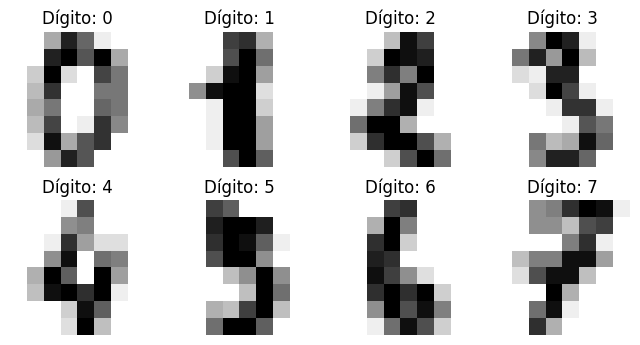

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(8, 4))
for ax, image, label in zip(axes.ravel(), data.images, data.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Dígito: {label}')
plt.show()

# Data preprocesamiento

In [11]:
# Min-Max scaling to the whole dataset.
X_min = X.min()
X_max = X.max()
X_range = X_max - X_min
X = (X - X_min)/X_range

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Clasificación con árboles

In [13]:
# Definición de parámetros para el grid de prueba
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(2,31,2)
max_leaf_nodes_grid = np.arange(2,51,2)
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

In [14]:
# instanciar GridSearchCV para un arbol de clasificación
# Con los parámetros definidos anteriormente
gridCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs = -1)

In [15]:
# Ajuste del modelo
gridCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'max_leaf_nodes': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50]),
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])})

In [16]:
# Obtengo las métricas de mejores hiperparámetros
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

In [17]:
print("Tree best max_depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))

Tree best max_depth : 12
Tree best min_samples_leaf : 2
Tree best max_leaf_nodes : 50


In [19]:
gridCV.best_score_

0.8312698412698414

In [20]:
gridCV.best_params_

{'max_depth': 12, 'max_leaf_nodes': 50, 'min_samples_leaf': 2}

In [21]:
gridCV.best_estimator_

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=50, min_samples_leaf=2)

In [22]:
DTC_best = DecisionTreeClassifier(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
DTC_best.fit(X_train, y_train)
y_pred = DTC_best.predict(X_test)
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Tree best accuracy : 0.844


In [ ]:
# Alternativa

# Paso 1: Instancia del modelo
# tree = DesicionTreeClassifier()

# Paso 2: instanciar el modelo con los mejores estimadores
# tree = gridCV.best_estimator_

# Paso 3: fit del modelo con lo mejores estimadores
# tree.fit(X_train, y_train)

In [23]:
from sklearn.tree import plot_tree

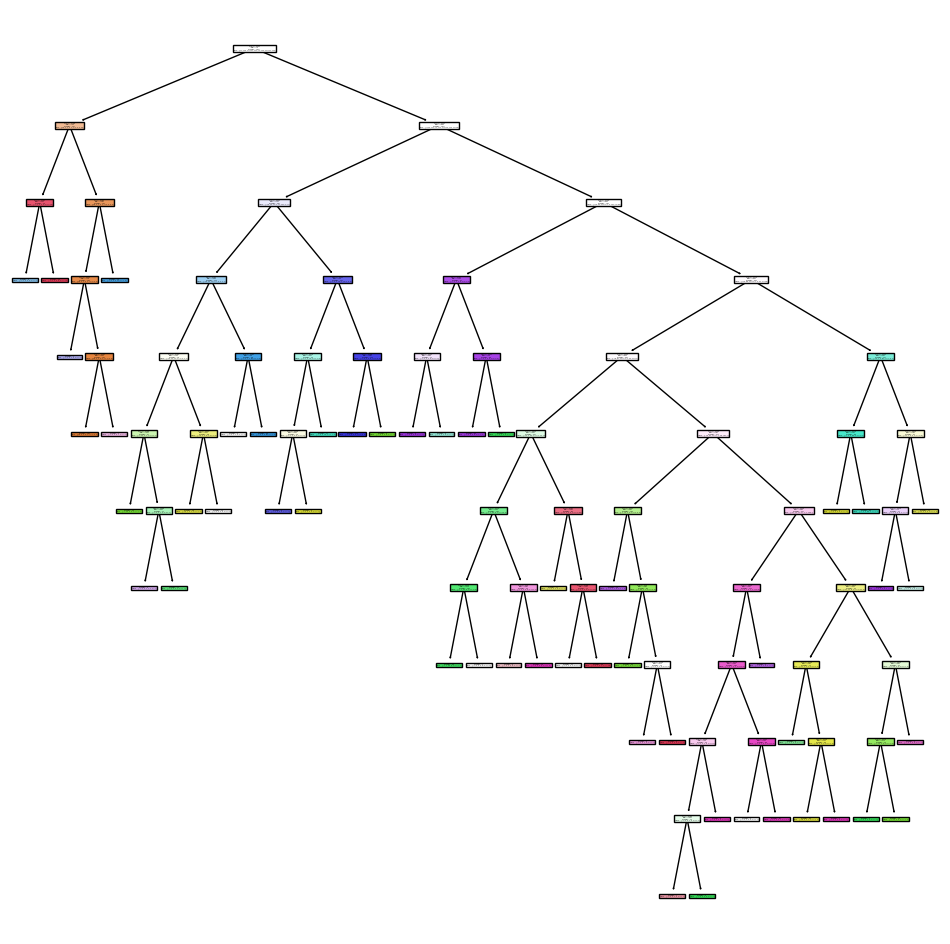

In [24]:
# Visualizar Decision Tree

fig, ax= plt.subplots(figsize=(12,12))
plot_tree(DTC_best,filled=True)
plt.show()

In [25]:
import seaborn as sns

In [27]:
y_pred_test_tree = DTC_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.77      0.88      0.82        56
           2       0.84      0.85      0.84        54
           3       0.87      0.86      0.86        56
           4       0.93      0.77      0.84        66
           5       0.90      0.87      0.88        61
           6       0.85      0.96      0.90        52
           7       0.77      0.88      0.82        50
           8       0.74      0.72      0.73        47
           9       0.84      0.71      0.77        51

    accuracy                           0.84       540
   macro avg       0.85      0.85      0.84       540
weighted avg       0.85      0.84      0.84       540



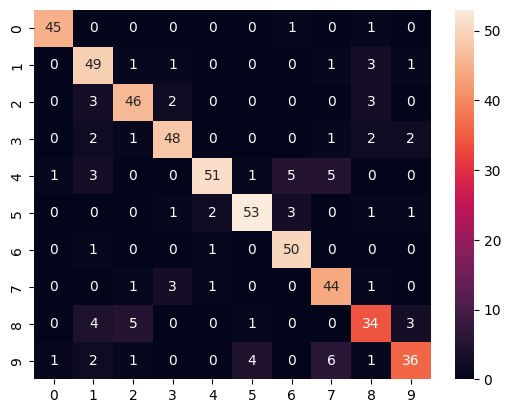

In [28]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred_test_tree)

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test_tree), annot=True)

print(metrics.classification_report(y_test, y_pred_test_tree))

# Clasificación con RF

In [31]:
n_estimators_grid = np.arange(20, 50,2)
depth_grid = np.arange(1, 10)
min_samples_leaf_grid = np.arange(10,21,2)
parameters = {'n_estimators': n_estimators_grid, 'max_depth': depth_grid, 'min_samples_leaf':min_samples_leaf_grid}
gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10, n_jobs=-1)
gridCV.fit(X_train, y_train)
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']

In [32]:
print("Random Forest best n_estimator : " + str(best_n_estim))
print("Random Forest best max_depth : " + str(best_depth))
print("Random Forest best min_samples_leaf : " + str(best_min_samples_leaf))

Random Forest best n_estimator : 42
Random Forest best max_depth : 9
Random Forest best min_samples_leaf : 10


In [35]:
RF_best = RandomForestClassifier(n_estimators=30,max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,random_state=123)
RF_best.fit(X_train, y_train)
y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Random Forest best accuracy : 0.935


In [ ]:
# Slide 392